##Speech Emotion Recognition

#Import Modules


In [22]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

##Load the Dataset

In [30]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/Data_Science/TESS_Toronto_emotional_speech_set_data.zip"
extract_path = "/content/drive/MyDrive/Data_Science/TESS_Toronto_emotional_speech_set_data/"

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Display the path of the extracted folder
extracted_folder_path = os.path.join(extract_path, os.path.splitext(os.path.basename(zip_path))[0])
print("Path of the extracted folder:", extracted_folder_path)


Path of the extracted folder: /content/drive/MyDrive/Data_Science/TESS_Toronto_emotional_speech_set_data/TESS_Toronto_emotional_speech_set_data


In [31]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Data_Science/TESS_Toronto_emotional_speech_set_data/TESS_Toronto_emotional_speech_set_data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [32]:
len(paths)


2800

In [33]:
paths[:5]


['/content/drive/MyDrive/Data_Science/TESS_Toronto_emotional_speech_set_data/TESS_Toronto_emotional_speech_set_data/OAF_angry/OAF_back_angry.wav',
 '/content/drive/MyDrive/Data_Science/TESS_Toronto_emotional_speech_set_data/TESS_Toronto_emotional_speech_set_data/OAF_angry/OAF_bar_angry.wav',
 '/content/drive/MyDrive/Data_Science/TESS_Toronto_emotional_speech_set_data/TESS_Toronto_emotional_speech_set_data/OAF_angry/OAF_base_angry.wav',
 '/content/drive/MyDrive/Data_Science/TESS_Toronto_emotional_speech_set_data/TESS_Toronto_emotional_speech_set_data/OAF_angry/OAF_bath_angry.wav',
 '/content/drive/MyDrive/Data_Science/TESS_Toronto_emotional_speech_set_data/TESS_Toronto_emotional_speech_set_data/OAF_angry/OAF_bean_angry.wav']

In [34]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [35]:
  ## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/Data_Science/TESS_Toron...,angry
1,/content/drive/MyDrive/Data_Science/TESS_Toron...,angry
2,/content/drive/MyDrive/Data_Science/TESS_Toron...,angry
3,/content/drive/MyDrive/Data_Science/TESS_Toron...,angry
4,/content/drive/MyDrive/Data_Science/TESS_Toron...,angry


In [36]:
df['label'].value_counts()


angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

##Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

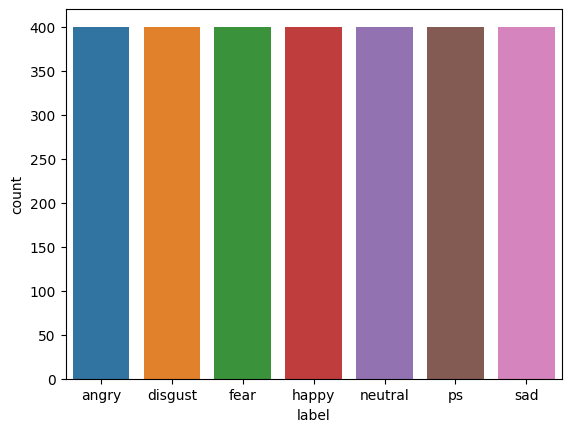

In [37]:
sns.countplot(data=df, x='label')


In [38]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

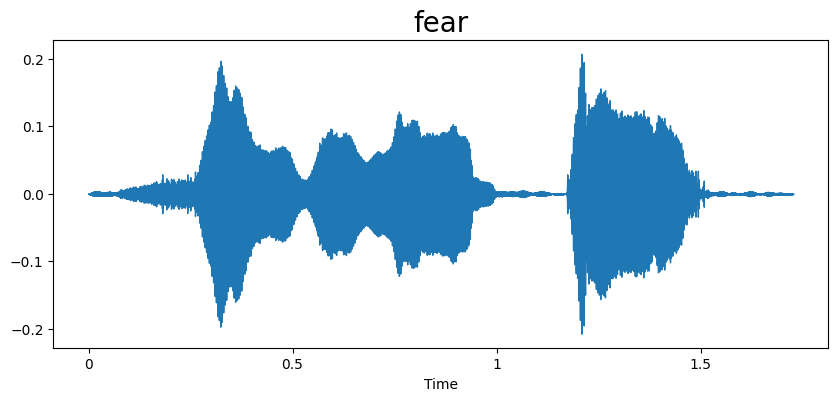

---------------------------------
Audio:



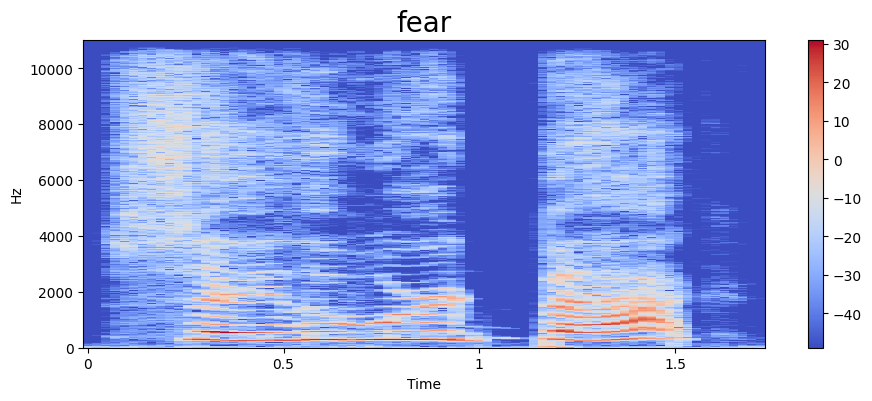

In [47]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
print('---------------------------------')
print('Audio:\n')

Audio(path)



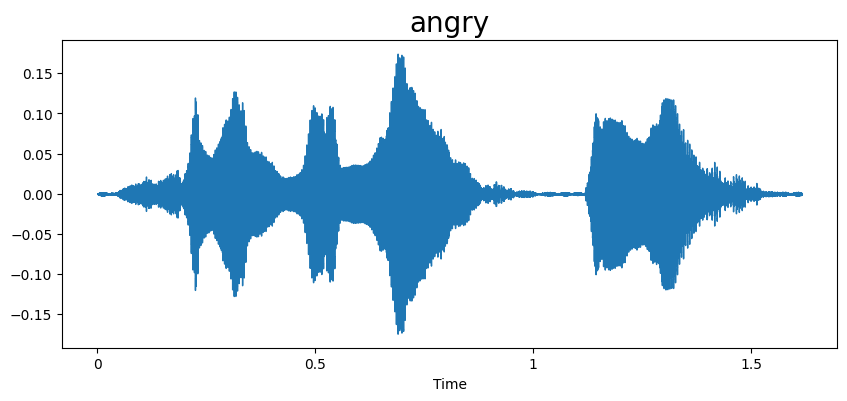

---------------------------------
Audio:



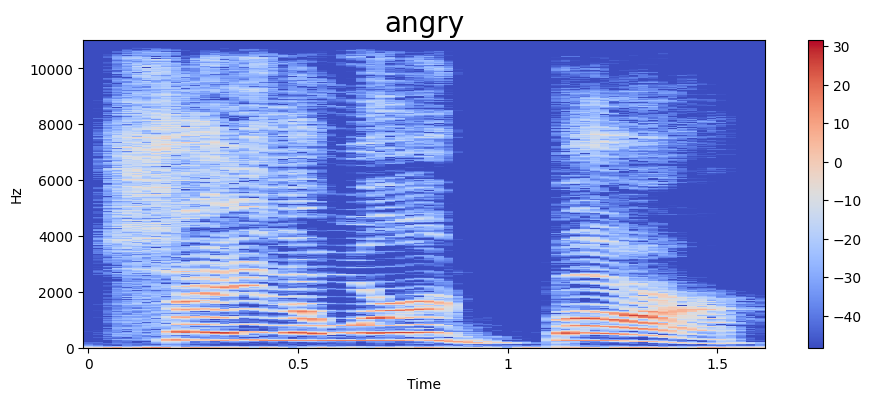

In [48]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
print('---------------------------------')
print('Audio:\n')

Audio(path)

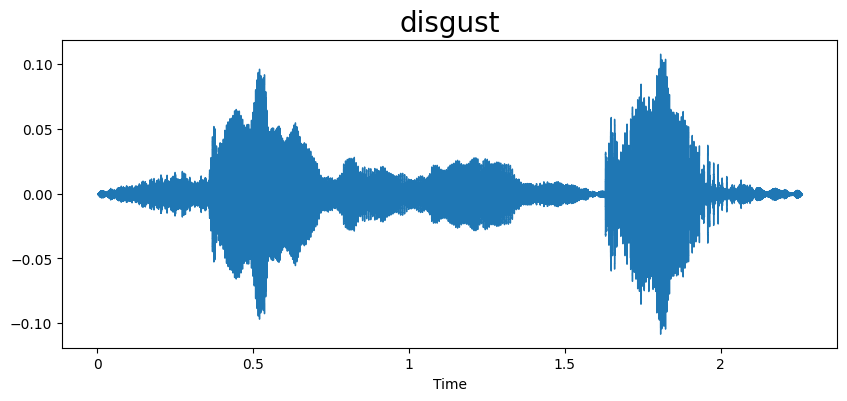

---------------------------------
Audio:



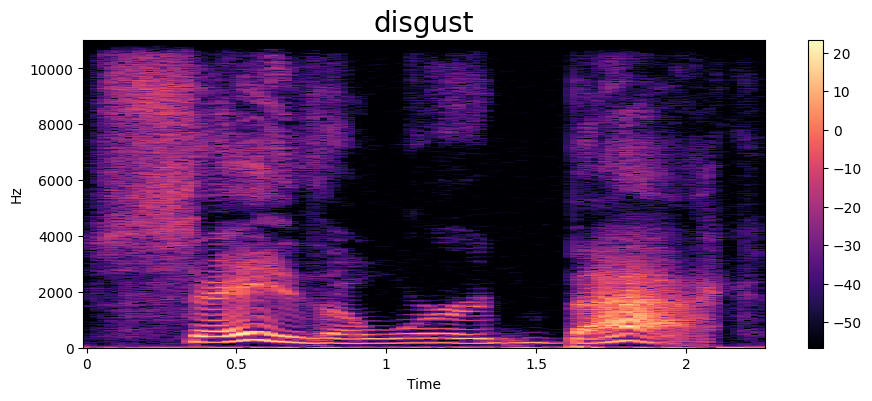

In [49]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
print('---------------------------------')
print('Audio:\n')

Audio(path)

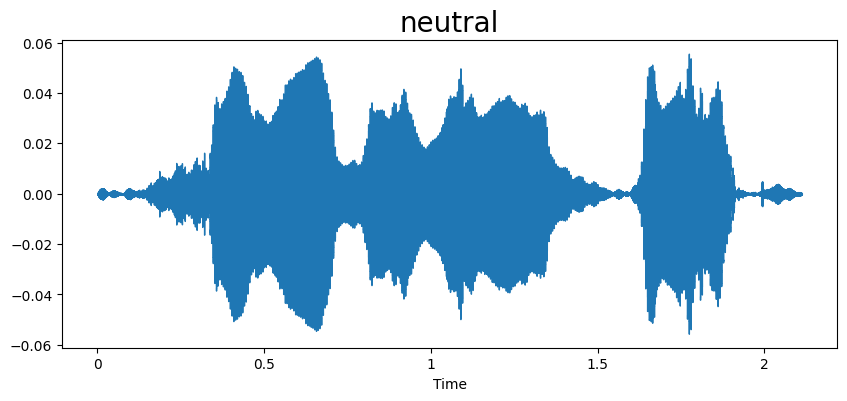

---------------------------------
Audio:



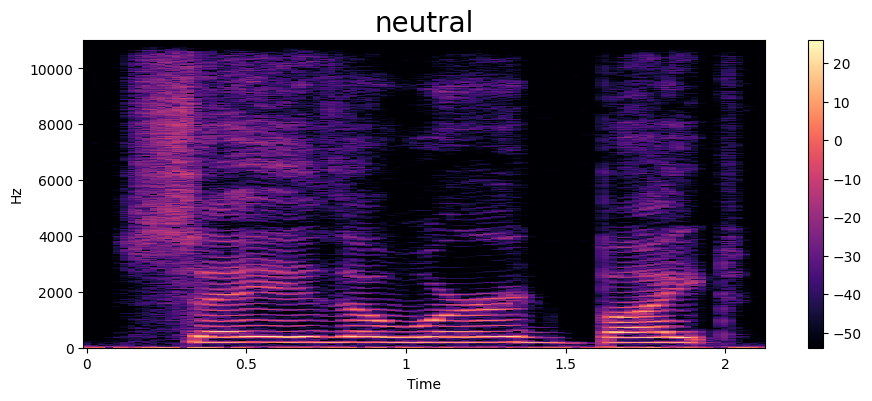

In [50]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
print('---------------------------------')
print('Audio:\n')

Audio(path)

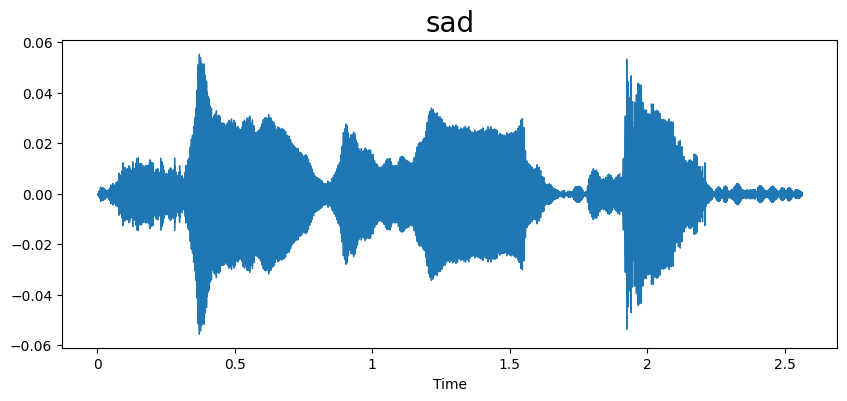

---------------------------------
Audio:



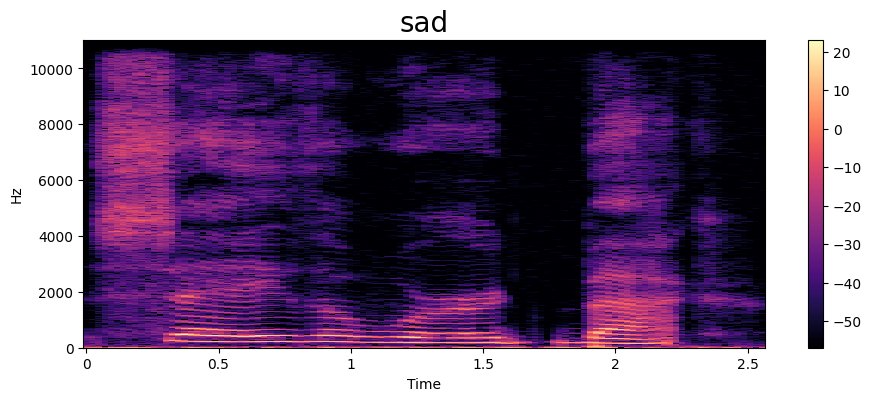

In [53]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
print('---------------------------------')
print('Audio:\n')

Audio(path)

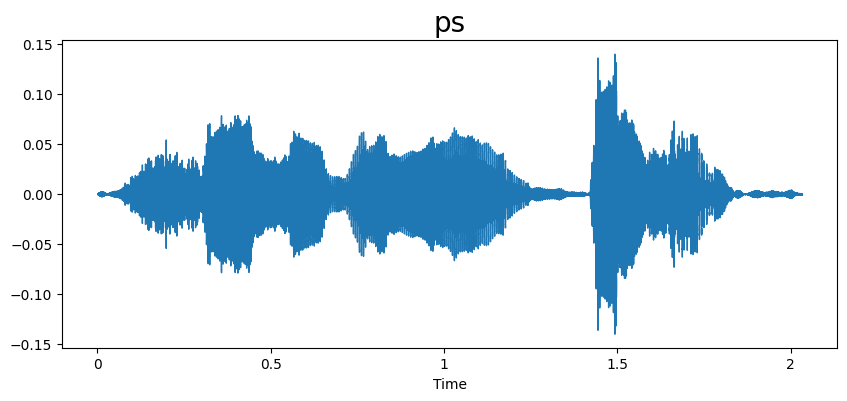

---------------------------------
Audio:



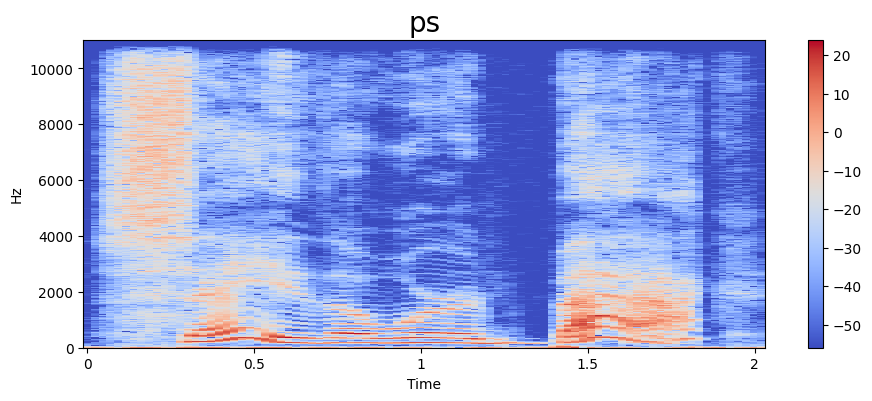

In [54]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
print('---------------------------------')
print('Audio:\n')

Audio(path)

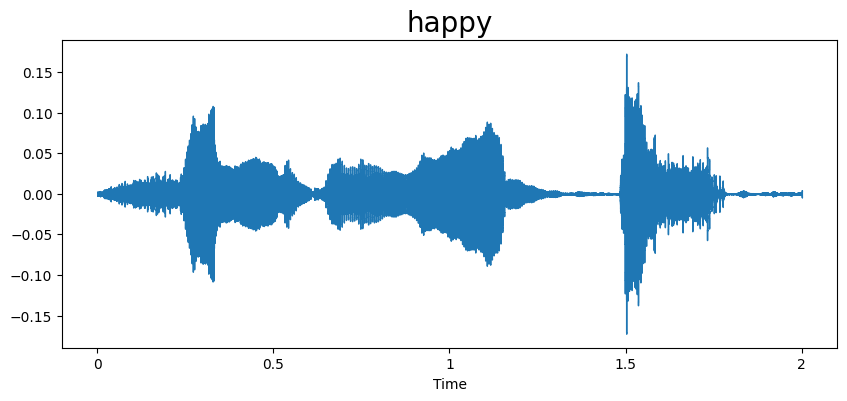

---------------------------------
Audio:



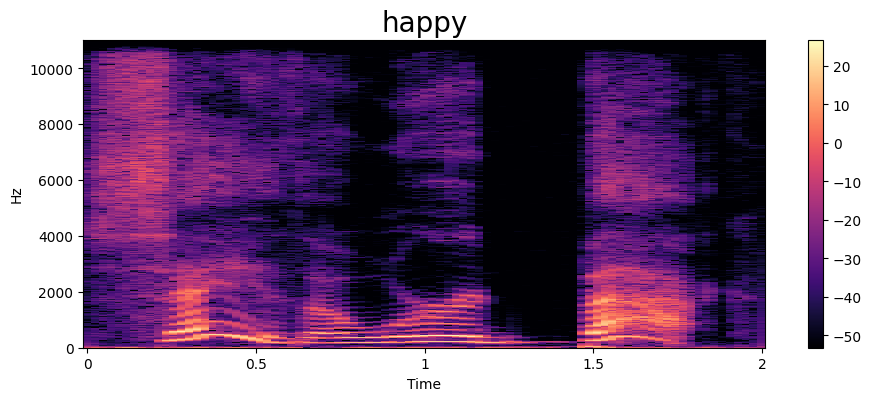

In [55]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
print('---------------------------------')
print('Audio:\n')

Audio(path)


* Waveplot and spectrogram of an audio file from each class is plotted

* Sample audio of emotion speech from each class is displayed

* Lower pitched voices have darker colors

* Higher pitched voices have more brighter colors




##Feature Extraction


In [56]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

* Audio duration capped to max 3 seconds for equal duration of file size

* It will extract the Mel-frequency cepstral coefficients (MFCC) features with the limit of 40 and take the mean as the final feature

In [57]:
extract_mfcc(df['speech'][0])


array([-3.96986298e+02,  7.74405365e+01, -1.95927925e+01, -2.16666927e+01,
       -2.11275530e+00,  1.00753660e+01, -2.03667088e+01, -6.09244871e+00,
       -7.21227980e+00, -5.57366371e-01, -1.83255494e+00,  2.02103406e-01,
        7.27553129e-01,  1.31773472e+00,  2.88634229e+00,  2.85579419e+00,
       -4.71292019e+00, -4.43651009e+00, -1.62115526e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79687607e+00, -7.03765059e+00,  9.43658543e+00,
        8.35586166e+00,  2.17123604e+01,  1.92169876e+01,  2.03489323e+01,
        1.34133692e+01,  8.33917236e+00,  3.94721806e-01,  5.11131763e+00,
        9.56873989e+00,  5.45486546e+00,  2.50996089e+00, -1.82390428e+00,
        4.86895704e+00,  9.31392193e+00,  2.08915091e+00, -1.90649259e+00],
      dtype=float32)

In [59]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))


* Returns extracted features from all the audio files

In [60]:
X_mfcc

0       [-396.9863, 77.44054, -19.592793, -21.666693, ...
1       [-465.73264, 98.77373, 0.65601397, -32.745438,...
2       [-429.79196, 46.124, 1.5550448, -0.21709608, 2...
3       [-403.46118, 76.3237, -12.531779, -22.288862, ...
4       [-434.0575, 77.44549, 10.865497, 16.092949, 8....
                              ...                        
2795    [-406.48056, 80.37988, 32.462395, 46.579098, -...
2796    [-426.90918, 102.54757, 24.80004, 43.0481, 4.6...
2797    [-378.50494, 80.91061, 35.300533, 39.74792, -4...
2798    [-434.86185, 89.906364, 28.37326, 39.577065, -...
2799    [-421.8341, 70.69788, 32.47639, 45.642555, 4.7...
Name: speech, Length: 2800, dtype: object

* Visualization of the features extracted from the data

* The more samples in the dataset, the longer the processing time

In [61]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

* Conversion of the list into a single dimensional array

In [62]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

* The shape represents the number of samples in the dataset and features in a single dimension array

In [63]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [64]:
y = y.toarray()

In [65]:
y.shape


(2800, 7)

* The shape represents the number of samples and number of output classes

##Create the LSTM Model


In [75]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ReduceLROnPlateau


model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 7)                

##LSTM Model Summary
* Dense - single dimension linear layer with hidden units

* Dropout - used to add regularization to the data, avoiding over fitting & dropping out a fraction of the data

* Loss='sparse_categorical_crossentropy' - computes the cross-entropy loss between true labels and predicted labels.

* Optimizer='adam' - automatically adjust the learning rate for the model over the number of epochs

In [76]:
# Train the model
# history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)
# Assuming X, y are your training data
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64, callbacks=[rlrp])

Epoch 1/50
35/35 [==============================] - 10s 240ms/step - loss: 1.2317 - accuracy: 0.5210 - val_loss: 2.0050 - val_accuracy: 0.3107 - lr: 0.0010
Epoch 2/50
35/35 [==============================] - 5s 146ms/step - loss: 0.5985 - accuracy: 0.7768 - val_loss: 2.2805 - val_accuracy: 0.3304 - lr: 0.0010
Epoch 3/50
35/35 [==============================] - 5s 148ms/step - loss: 0.3722 - accuracy: 0.8763 - val_loss: 1.2701 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/50
35/35 [==============================] - 7s 205ms/step - loss: 0.2267 - accuracy: 0.9290 - val_loss: 1.6704 - val_accuracy: 0.4768 - lr: 0.0010
Epoch 5/50
35/35 [==============================] - 5s 142ms/step - loss: 0.1487 - accuracy: 0.9554 - val_loss: 2.0893 - val_accuracy: 0.4571 - lr: 0.0010
Epoch 6/50
35/35 [==============================] - 5s 156ms/step - loss: 0.1773 - accuracy: 0.9438 - val_loss: 1.2120 - val_accuracy: 0.7036 - lr: 0.0010
Epoch 7/50
35/35 [==============================] - 7s 201ms/step - l

In [77]:
# Print final training and validation accuracy
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {train_accuracy}")
print(f"Final Validation Accuracy: {val_accuracy}")

Final Training Accuracy: 0.9995535612106323
Final Validation Accuracy: 0.5410714149475098


**Best val_accuracy was: *70.36***

##Plot the results


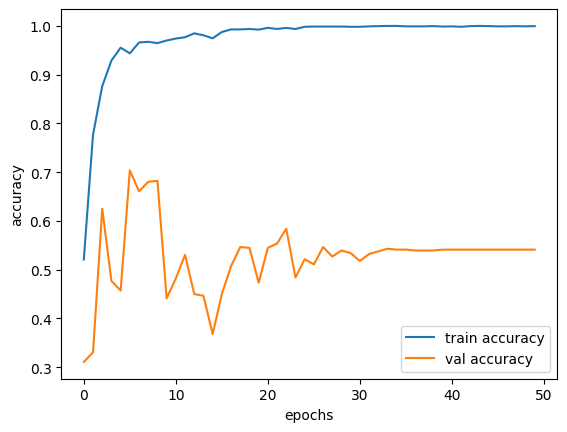

In [78]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

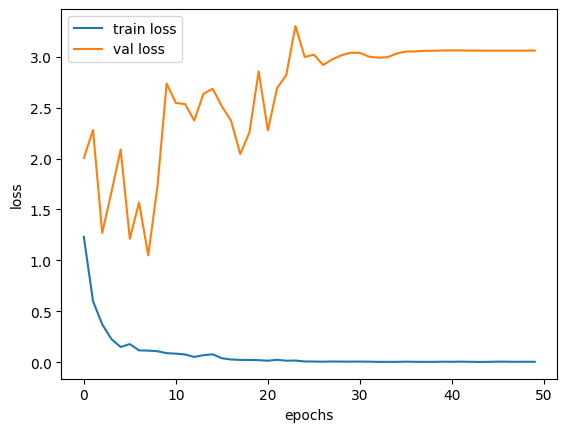

In [79]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()